# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Cleaned Dataset

In [2]:
retail_sales = pd.read_csv("../data/cleaned/retail_sales_cleaned.csv")

# Reassign proper column types

# Change date data type to datetime
retail_sales["date"] = pd.to_datetime(retail_sales["date"], format="%Y-%m-%d")

# Change gender data type to category
retail_sales["gender"] = retail_sales["gender"].astype("category")

# Change product_category data type to category
retail_sales["product_category"] = retail_sales["product_category"].astype("category")

# 3. Dataset Overview

In [3]:
pd.concat([retail_sales.head(), retail_sales.tail()])

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [4]:
retail_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    1000 non-null   int64         
 1   date              1000 non-null   datetime64[ns]
 2   customer_id       1000 non-null   object        
 3   gender            1000 non-null   category      
 4   age               1000 non-null   int64         
 5   product_category  1000 non-null   category      
 6   quantity          1000 non-null   int64         
 7   price_per_unit    1000 non-null   int64         
 8   total_amount      1000 non-null   int64         
dtypes: category(2), datetime64[ns](1), int64(5), object(1)
memory usage: 57.0+ KB


In [5]:
retail_sales.describe()

,transaction_id,date,age,quantity,price_per_unit,total_amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [6]:
retail_sales.describe(include="object")

,customer_id
count,1000
unique,1000
top,CUST001
freq,1


In [7]:
retail_sales.describe(include="category")

,gender,product_category
count,1000,1000
unique,2,3
top,Female,Clothing
freq,510,351


# 4. Univariate Analysis

In [8]:
retail_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    1000 non-null   int64         
 1   date              1000 non-null   datetime64[ns]
 2   customer_id       1000 non-null   object        
 3   gender            1000 non-null   category      
 4   age               1000 non-null   int64         
 5   product_category  1000 non-null   category      
 6   quantity          1000 non-null   int64         
 7   price_per_unit    1000 non-null   int64         
 8   total_amount      1000 non-null   int64         
dtypes: category(2), datetime64[ns](1), int64(5), object(1)
memory usage: 57.0+ KB


In [9]:
plt.style.use("default")

## 4.1 date

In [10]:
retail_sales["date"].describe()

count                             1000
mean     2023-07-03 00:25:55.200000256
min                2023-01-01 00:00:00
25%                2023-04-08 00:00:00
50%                2023-06-29 12:00:00
75%                2023-10-04 00:00:00
max                2024-01-01 00:00:00
Name: date, dtype: object

**Conclusion :** 
- The dataset spans from 2023-01-01 to 2024-01-01 (one-year period from 2023 to 2024).
- The mean of 2023-07-03 might suggest that there is slightly more data volume in the latter half of the year.

## 4.2 customer_id

In [11]:
retail_sales["customer_id"].describe()

count        1000
unique       1000
top       CUST001
freq            1
Name: customer_id, dtype: object

**Conclusion :** \
The fact that the count and unique values are the same, means that :

- every customer is unique
- every transaction is done by a different customer
- no customer did a transaction more than once

## 4.3 gender

In [12]:
retail_sales["gender"].value_counts()

gender
Female    510
Male      490
Name: count, dtype: int64

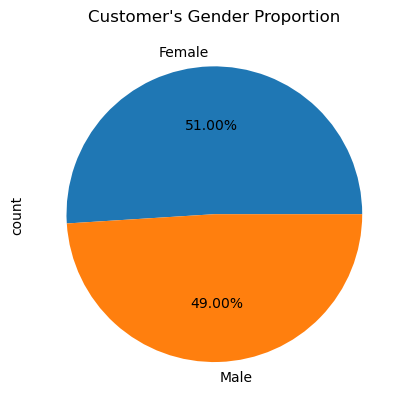

In [13]:
# Create the pie chart
retail_sales["gender"].value_counts().plot(
    kind="pie", 
    autopct="%1.2f%%", 
    title="Customer's Gender Proportion"
)

# Save the chart as an image file
plt.savefig("../plots/customers_gender_proportion.png", dpi=300, bbox_inches="tight")

# Optionally display the chart
plt.show()

**Conclusion :** 
- slight majority of the customers are female (51%) comparted to males (49%). This indicates that the gender distribution of the customer is quite balanced.

## 4.4 age

In [14]:
retail_sales["age"].describe()

count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: age, dtype: float64

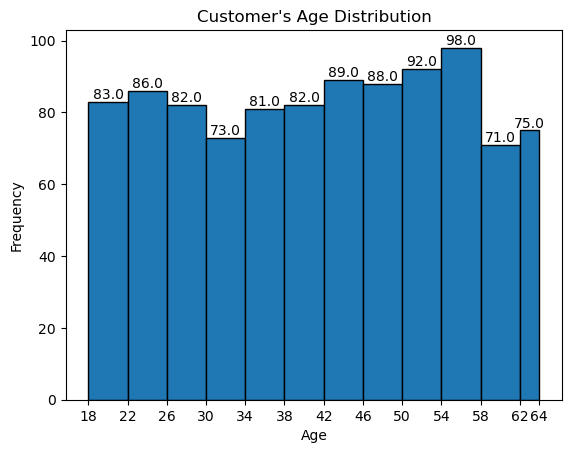

In [15]:
# Define the bin edges with a range of 4 for most bins and 2 for the last one
bin_edges = np.arange(min(retail_sales["age"]), max(retail_sales["age"]) + 4, 4)
bin_edges[-1] = bin_edges[-2] + 2  # Adjust the last bin edge to have a range of 2

# Plot histogram with custom bin edges and no space between the bars
ax = retail_sales["age"].plot(kind="hist", bins=bin_edges, edgecolor='black', rwidth=1)

# Set axis labels
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Customer's Age Distribution")

# Set x-ticks to be the bin edges
plt.xticks(bin_edges)

# Display values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)

# Save the plot as an image file
plt.savefig("../plots/customers_age_distribution.png", dpi=300, bbox_inches="tight")

# Optionally display the plot
plt.show()


In [16]:
retail_sales["age"].skew()

-0.04881245380328967

**Conclusion :** 

- The average age of the customer is 43.39.
- The median age of the customer is 42
- The customer's age range is from 18 to 64 years old.
- The skewness (-0.0488) is very close to 0, which means the age distribution is relatively symmetric, with a slight tendency to skew to the younger age.

## 4.5 product_category

In [17]:
retail_sales["product_category"].describe()

count         1000
unique           3
top       Clothing
freq           351
Name: product_category, dtype: object

In [18]:
retail_sales["product_category"].value_counts()

product_category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

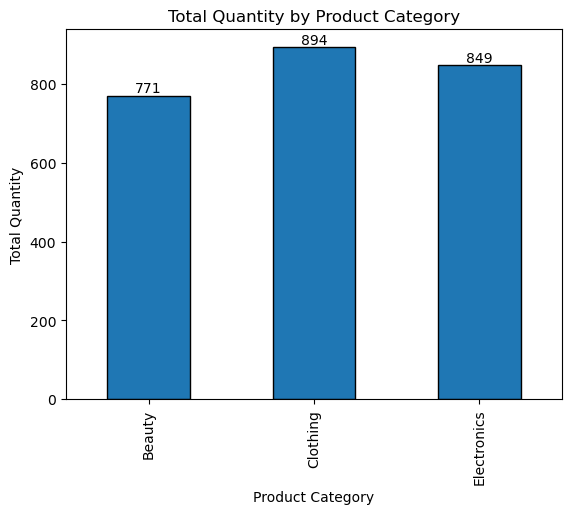

In [19]:
# Group by 'product_category', then sum the 'quantity'
grouped_data = retail_sales[["product_category", "quantity"]].groupby(["product_category"], observed=False).sum()

# Create a bar plot
ax = grouped_data.plot(kind="bar", stacked=False, legend=False, edgecolor="black")

# Set labels and title
plt.xlabel("Product Category")
plt.ylabel("Total Quantity")
plt.title("Total Quantity by Product Category")

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)

# Save the plot as an image file
plt.savefig("../plots/total_quantity_by_product_category.png", dpi=300, bbox_inches="tight")

# Show plot
plt.show()


**Conclusion :** 
- The bar graph indicates that the*most purchased product is Clothing (351 units), followed closely by Electronics (342 units), and Beauty (307 units). However, the differences between the categories are minimal, suggesting a nearly symmetrical distribution of purchases across these product categories.

## 4.6 quantity

In [20]:
retail_sales["quantity"].describe()

count    1000.000000
mean        2.514000
std         1.132734
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: quantity, dtype: float64

In [21]:
retail_sales["quantity"].value_counts()

quantity
4    263
1    253
2    243
3    241
Name: count, dtype: int64

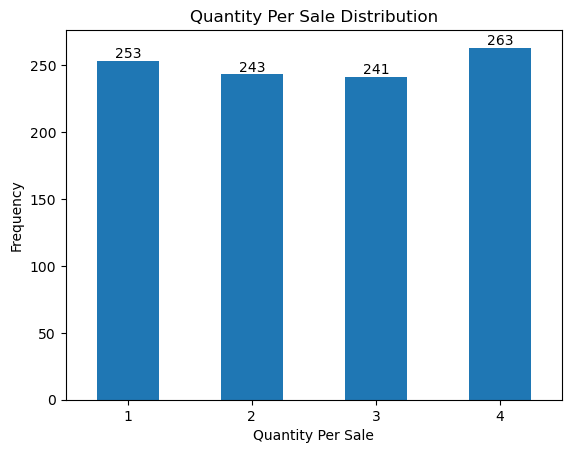

In [22]:
# Create bar plot
ax = retail_sales["quantity"].value_counts().sort_index().plot(
    kind="bar", xlabel="Quantity Per Sale", ylabel="Frequency", title="Quantity Per Sale Distribution", rot=0
)

# Display values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position of the text
                ha='center', va='bottom', fontsize=10)

# Save the plot as an image file
plt.savefig("../plots/quantity_per_sale_distribution.png", dpi=300, bbox_inches="tight")

# Optionally display the plot
plt.show()

**Conclusion :**
- All of the purchase quantity per sale is ranging from 1 to 4
- The average purchase quantity per sale is 2.51
- The graph above shows that the purchase quantity per sale is almost uniformly distributed

## 4.7 price_per_unit

In [23]:
retail_sales["price_per_unit"].describe()

count    1000.000000
mean      179.890000
std       189.681356
min        25.000000
25%        30.000000
50%        50.000000
75%       300.000000
max       500.000000
Name: price_per_unit, dtype: float64

In [24]:
retail_sales["price_per_unit"]

0       50
1      500
2       30
3      500
4       50
      ... 
995     50
996     30
997     25
998     50
999     30
Name: price_per_unit, Length: 1000, dtype: int64

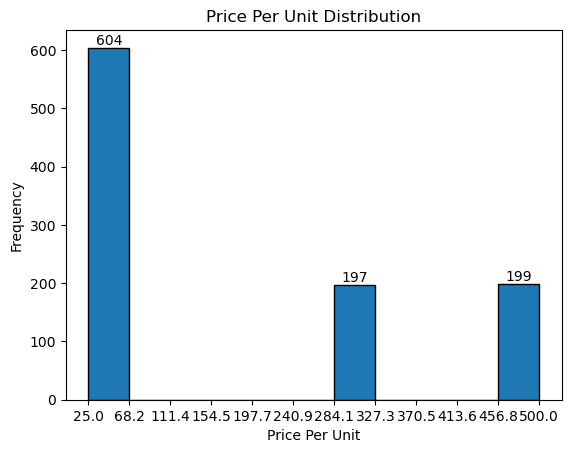

In [25]:
# Define the data and bins
data = retail_sales["price_per_unit"]
bins = np.histogram_bin_edges(data, bins='auto')  # Automatically determine optimal bins

# Create the histogram plot
ax = data.plot(kind="hist", bins=bins, edgecolor="black", xlabel="Price Per Unit", ylabel="Frequency", title="Price Per Unit Distribution")

# Annotate the bars with their heights
for bar in ax.patches:
    height = bar.get_height()  # Get the height of the bar
    if height > 0:  # Only annotate bars with non-zero height
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # Center the text horizontally
            height,  # Position the text at the height of the bar
            f"{int(height)}",  # Display the value as an integer
            ha="center", va="bottom", fontsize=10  # Align text
        )

# Set the x-axis ticks to match the bin edges
plt.xticks(bins)

# Save the plot as an image file
plt.savefig("../plots/price_per_unit_distribution.png", dpi=300, bbox_inches="tight")

# Optionally display the plot
plt.show()

In [26]:
retail_sales["price_per_unit"].skew()

0.7363077780665441

**Conclusion :**
- Most of the products have a price ranging between 25 to 68.2
- The average price per unThe skewnessit is 50
- The skewness value of 0.7363 means that the data is positively skewed / the distribution has a longer tail on the right side. Most of the data points are clustered towards the lower range, with some higher-priced items pulling the tail to the right

## 4.8 total_amount

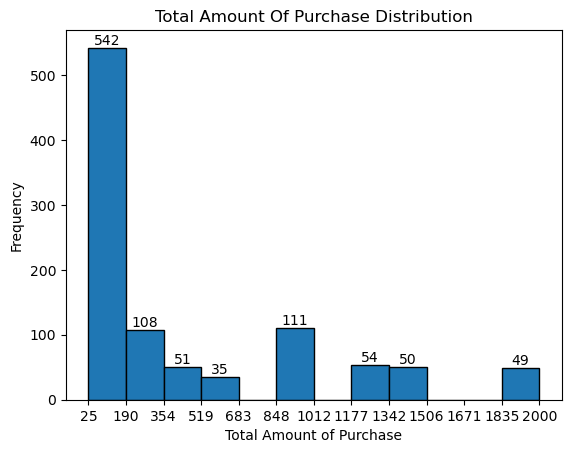

In [27]:
# Define the data and bins
data = retail_sales["total_amount"]
bins = np.histogram_bin_edges(data, bins='auto')  # Automatically determine optimal bins

# Create the histogram plot
ax = data.plot(kind="hist", bins=bins, edgecolor="black", xlabel="Total Amount of Purchase", ylabel="Frequency", title="Total Amount Of Purchase Distribution")

# Annotate the bars with their heights
for bar in ax.patches:
    height = bar.get_height()  # Get the height of the bar
    if height > 0:  # Only annotate bars with non-zero height
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # Center the text horizontally
            height,  # Position the text at the height of the bar
            f"{int(height)}",  # Display the value as an integer
            ha="center", va="bottom", fontsize=10  # Align text
        )

# Set the x-axis ticks to match the bin edges
plt.xticks(bins)

# Save the plot as an image file
plt.savefig("../plots/total_amount_distribution.png", dpi=300, bbox_inches="tight")

# Optionally display the plot
plt.show()

In [28]:
retail_sales["total_amount"].describe()

count    1000.000000
mean      456.000000
std       559.997632
min        25.000000
25%        60.000000
50%       135.000000
75%       900.000000
max      2000.000000
Name: total_amount, dtype: float64

In [29]:
retail_sales["total_amount"].sum()

456000

**Conclusion:**  
- Most customers spend between **25** and **190** per purchase.  
- On average, customers spend approximately **456** per purchase.  
- The total revenue generated by the company during the period amounts to **456,000**.  

# 5. Bivariate Analysis

## Numerical vs Numerical

In [30]:
retail_sales_corr = retail_sales.corr(numeric_only="True").drop("transaction_id").drop("transaction_id", axis="columns")
retail_sales_corr

,age,quantity,price_per_unit,total_amount
age,1.000000,-0.023737,-0.038423,-0.060568
quantity,-0.023737,1.000000,0.017501,0.373707
price_per_unit,-0.038423,0.017501,1.000000,0.851925
total_amount,-0.060568,0.373707,0.851925,1.000000


## 5.1 quantity vs total_amount

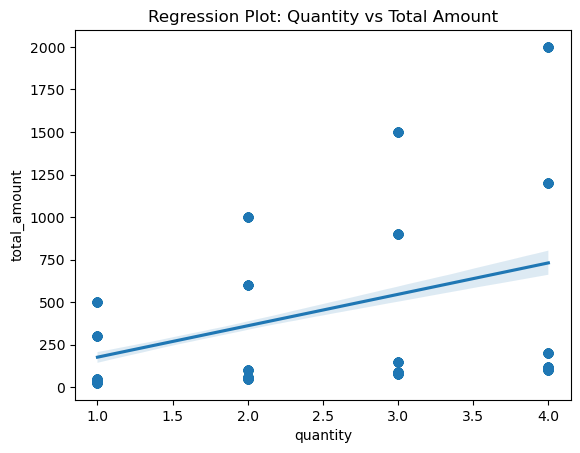

In [31]:
# Create the regplot
sns.regplot(data=retail_sales, x="quantity", y="total_amount")

# Add a title to the plot
plt.title("Regression Plot: Quantity vs Total Amount")

# Save the plot as an image file
plt.savefig("../plots/quantity_vs_total_amount_regplot.png", dpi=300, bbox_inches="tight")

# Optionally display the plot
plt.show()

In [32]:
retail_sales["quantity"].corr(retail_sales["total_amount"])

0.37370705412140603

**Conclusion :** 
- The correlation value of 0.3737 indicates that there is a weak to moderate positive correlation between the quantity and total amount. This indicates that as the quantity of items purchased increases, the total amount spent generally rises as well. However, the relationship between the two is only moderately strong, suggesting that other factors may also influence total spending.


## 5.2 price_per_unit vs total_amount

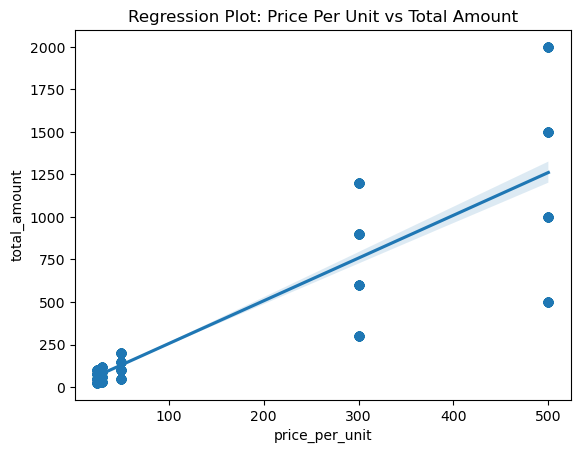

In [33]:
# Create the regplot
sns.regplot(data=retail_sales, x="price_per_unit", y="total_amount")

# Add a title to the plot
plt.title("Regression Plot: Price Per Unit vs Total Amount")

# Save the plot as an image file
plt.savefig("../plots/price_per_unit_vs_total_amount_regplot.png", dpi=300, bbox_inches="tight")

# Optionally display the plot
plt.show()

In [34]:
retail_sales["price_per_unit"].corr(retail_sales["total_amount"])

0.8519248403554038

**Conclusion:**
- The correlation value of 0.8519 indicates a strong positive correlation between price_per_unit and total_amount. This means that as the price per unit of items increases, the total amount spent by customers tends to increase as well. The relationship is strong, suggesting that higher-priced items are a major factor in driving up the total amount spent.

<Axes: xlabel='age'>

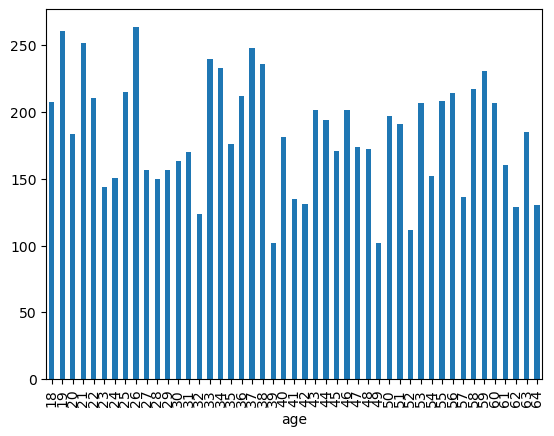

In [35]:


data = retail_sales[["age", "quantity", "total_amount"]].groupby("age").sum()

data["average_purchase"] = data["total_amount"] / data["quantity"]

data["average_purchase"].plot(kind="bar")

## Categorical vs Categorical

## 5.3 gender vs product_category

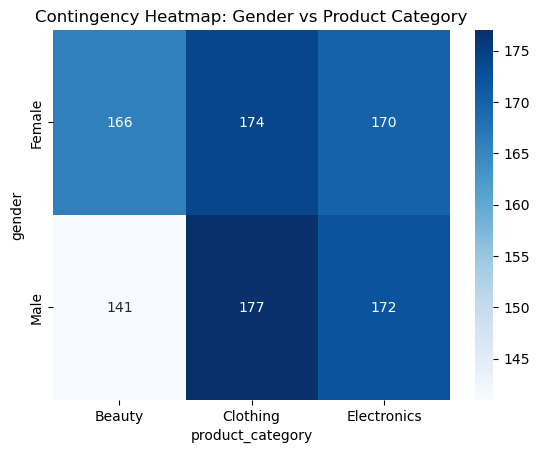

In [36]:
# Create the contingency table
contigency_table = pd.crosstab(retail_sales["gender"], retail_sales["product_category"])

# Create the heatmap
sns.heatmap(contigency_table, annot=True, fmt="d", cmap="Blues")

# Add a title to the heatmap
plt.title("Contingency Heatmap: Gender vs Product Category")

# Save the plot as an image file
plt.savefig("../plots/gender_vs_product_category_heatmap.png", dpi=300, bbox_inches="tight")

# Optionally display the plot
plt.show()

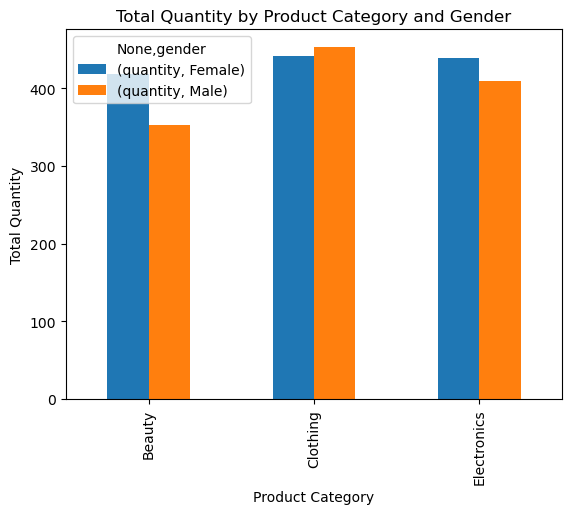

In [37]:
# Group by 'product_category' and 'gender', then sum the 'quantity'
grouped_data = retail_sales[["product_category", "gender", "quantity"]].groupby(["product_category", "gender"], observed=False).sum()

# Create a bar plot
ax = grouped_data.unstack().plot(kind="bar", stacked=False)

# Set labels and title
plt.xlabel("Product Category")
plt.ylabel("Total Quantity")
plt.title("Total Quantity by Product Category and Gender")

# Save the plot as an image file
plt.savefig("../plots/total_quantity_by_product_category_and_gender.png", dpi=300, bbox_inches="tight")

# Show plot
plt.show()

**Conclusion:**
- For clothing and electronics product the ratio of the female and male customer is almost the same
- Beauty product has more female customers, although the difference isn't too large.

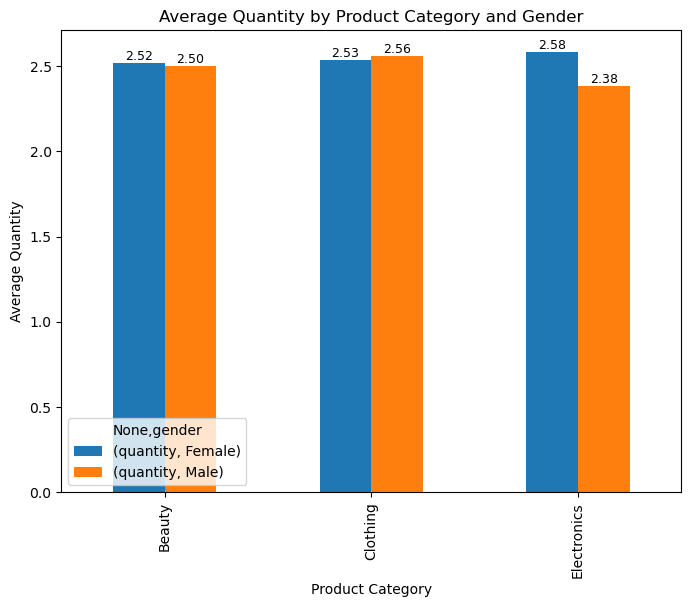

In [38]:
import matplotlib.pyplot as plt

# Group by 'product_category' and 'gender', then calculate the mean 'quantity'
grouped_data = retail_sales[["product_category", "gender", "quantity"]].groupby(["product_category", "gender"], observed=False).mean()

# Create a bar plot
ax = grouped_data.unstack().plot(kind="bar", stacked=False, figsize=(8, 6))

# Set labels and title
plt.xlabel("Product Category")
plt.ylabel("Average Quantity")
plt.title("Average Quantity by Product Category and Gender")

# Add exact values on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only display for bars with non-zero height
        ax.annotate(f'{height:.2f}', 
                    (p.get_x() + p.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=9)

# Save the plot as an image file
plt.savefig("../plots/average_quantity_by_product_category_and_gender.png", dpi=300, bbox_inches="tight")

# Show plot
plt.show()


## Numerical vs Categorical

## 5.4 gender vs age

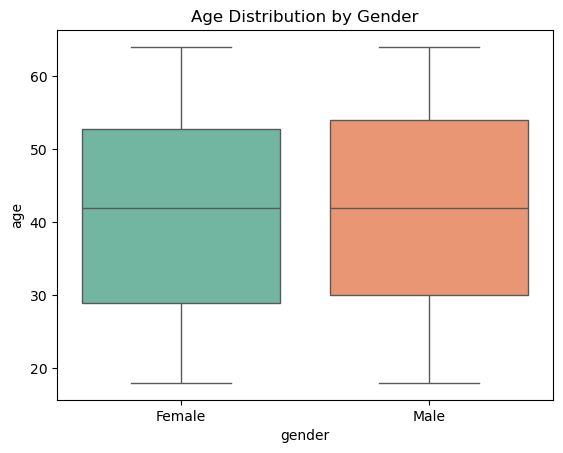

In [39]:
# Create the boxplot
sns.boxplot(data=retail_sales, x="gender", y="age", hue="gender", palette="Set2")

# Add a title to the plot
plt.title("Age Distribution by Gender")

# Save the plot as an image file
plt.savefig("../plots/age_distribution_by_gender_boxplot.png", dpi=300, bbox_inches="tight")

# Optionally display the plot
plt.show()

In [40]:
retail_sales.groupby("gender", observed=False)["age"].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,510.0,41.356863,13.568067,18.0,29.0,42.0,52.75,64.0
Male,490.0,41.428571,13.812208,18.0,30.0,42.0,54.00,64.0


**Conclusion:**
- The age distribution between both genders male and female is relatively similar.

## 5.5 gender vs quantity

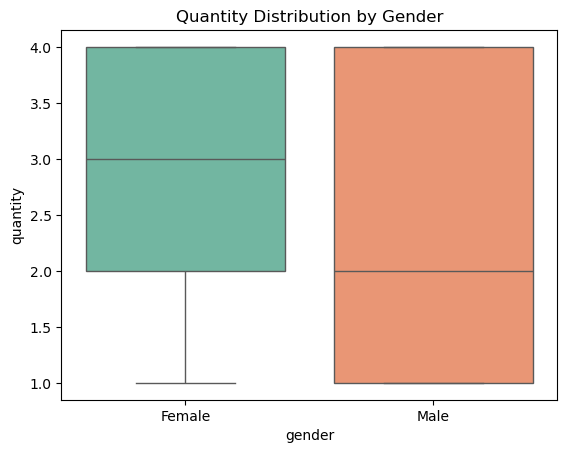

In [41]:
# Create the boxplot
sns.boxplot(data=retail_sales, x="gender", y="quantity", hue="gender", palette="Set2")

# Add a title to the plot
plt.title("Quantity Distribution by Gender")

# Save the plot as an image file
plt.savefig("../plots/quantity_distribution_by_gender_boxplot.png", dpi=300, bbox_inches="tight")

# Optionally display the plot
plt.show()

In [42]:
retail_sales.groupby("gender", observed=False)["quantity"].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,510.0,2.545098,1.132189,1.0,2.0,3.0,4.0,4.0
Male,490.0,2.481633,1.133551,1.0,1.0,2.0,4.0,4.0


**Conclusion:**  
- The purchase quantity distribution between male and female customers is remarkably similar.  
- On average, female customers purchase slightly more items per transaction (2.55) compared to male customers (2.48). This indicates a minor difference in buying behavior between genders.

## 5.6 gender vs price_per_unit

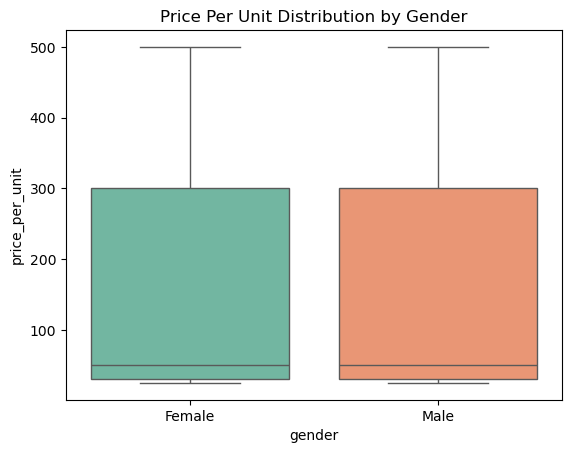

In [43]:
# Create the boxplot
sns.boxplot(data=retail_sales, x="gender", y="price_per_unit", hue="gender", palette="Set2")

# Add a title to the plot
plt.title("Price Per Unit Distribution by Gender")

# Save the plot as an image file
plt.savefig("../plots/price_per_unit_distribution_by_gender_boxplot.png", dpi=300, bbox_inches="tight")

# Optionally display the plot
plt.show()

In [44]:
retail_sales.groupby("gender", observed=False)["price_per_unit"].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,510.0,180.068627,188.849649,25.0,30.0,50.0,300.0,500.0
Male,490.0,179.704082,190.736020,25.0,30.0,50.0,300.0,500.0


**Conclusion:**  
- Both genders exhibit similar purchasing behavior in terms of product prices.  
- Female customers, on average, purchase items priced slightly higher (180.07) compared to male customers (179.70), suggesting a minor preference for higher-priced products among female customers.

<Axes: xlabel='gender', ylabel='price_per_unit'>

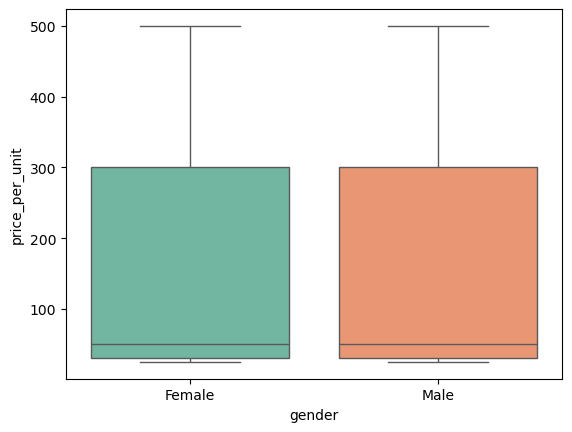

In [45]:
data = retail_sales[retail_sales["product_category"] == "Beauty"]

sns.boxplot(data=data, x="gender", y="price_per_unit", hue="gender", palette="Set2")

## 5.7 gender vs total_amount

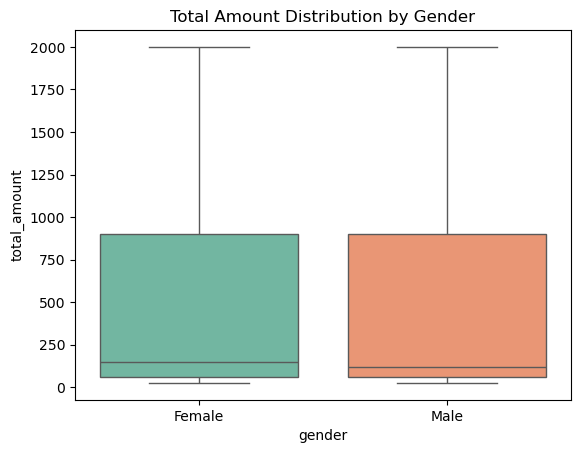

In [46]:
# Create the boxplot
sns.boxplot(data=retail_sales, x="gender", y="total_amount", hue="gender", palette="Set2")

# Add a title to the plot
plt.title("Total Amount Distribution by Gender")

# Save the plot as an image file
plt.savefig("../plots/total_amount_distribution_by_gender_boxplot.png", dpi=300, bbox_inches="tight")

# Optionally display the plot
plt.show()

In [47]:
retail_sales.groupby("gender", observed=False)["total_amount"].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,510.0,456.549020,554.299371,25.0,60.0,150.0,900.0,2000.0
Male,490.0,455.428571,566.433809,25.0,60.0,120.0,900.0,2000.0


**Conclusion:**  
- Both genders exhibit similar purchasing behavior in terms of total spending amount.  
- Female customers, spend (456.55) compared to male customers (455.43), suggesting that female customers spend a little bit more than male customers

## 5.8 product_category vs age

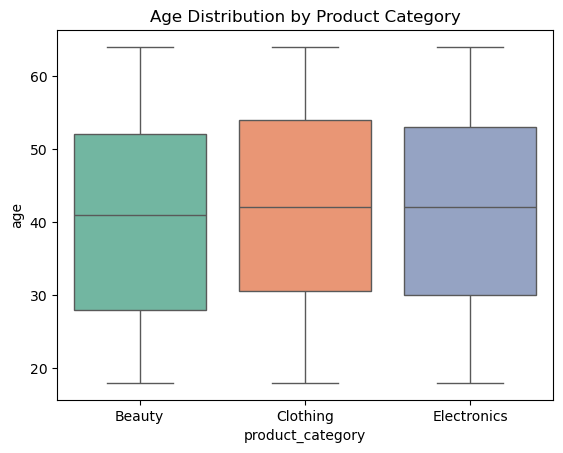

In [48]:
# Create the boxplot
sns.boxplot(data=retail_sales, x="product_category", y="age", hue="product_category", palette="Set2")

# Add a title to the plot
plt.title("Age Distribution by Product Category")

# Save the plot as an image file
plt.savefig("../plots/age_distribution_by_product_category_boxplot.png", dpi=300, bbox_inches="tight")

# Optionally display the plot
plt.show()

In [49]:
retail_sales.groupby("product_category", observed=False)["age"].describe()

,count,mean,std,min,25%,50%,75%,max
product_category,,,,,,,,
Beauty,307.0,40.371336,13.889817,18.0,28.0,41.0,52.0,64.0
Clothing,351.0,41.948718,13.498262,18.0,30.5,42.0,54.0,64.0
Electronics,342.0,41.736842,13.669573,18.0,30.0,42.0,53.0,64.0


**Conclusion:**  
- The age distribution across different product categories is fairly similar.  
- On average, customers purchasing beauty products are 40.37 years old, while those buying clothing are slightly older at 41.95 years, and electronics buyers have an average age of 41.74 years.

## 5.9 product_category vs quantity

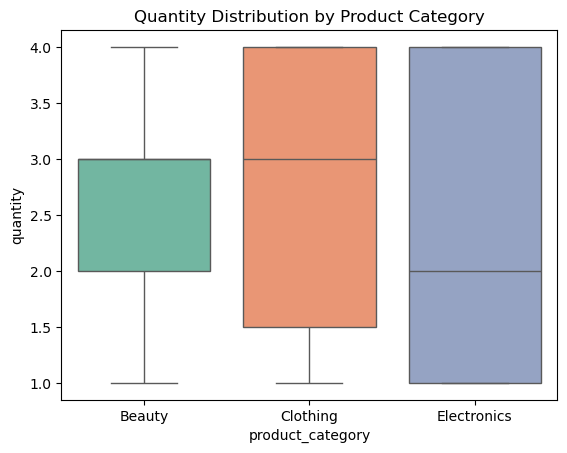

In [50]:
# Create the boxplot
sns.boxplot(data=retail_sales, x="product_category", y="quantity", hue="product_category", palette="Set2")

# Add a title to the plot
plt.title("Quantity Distribution by Product Category")

# Save the plot as an image file
plt.savefig("../plots/quantity_distribution_by_product_category_boxplot.png", dpi=300, bbox_inches="tight")

# Optionally display the plot
plt.show()

In [51]:
retail_sales.groupby("product_category", observed=False)["quantity"].sum()

product_category
Beauty         771
Clothing       894
Electronics    849
Name: quantity, dtype: int64

In [52]:
retail_sales.groupby("product_category", observed=False)["quantity"].describe()

,count,mean,std,min,25%,50%,75%,max
product_category,,,,,,,,
Beauty,307.0,2.511401,1.100668,1.0,2.0,3.0,3.0,4.0
Clothing,351.0,2.547009,1.142647,1.0,1.5,3.0,4.0,4.0
Electronics,342.0,2.482456,1.153084,1.0,1.0,2.0,4.0,4.0


**Conclusion:**  
- Clothing is the most popular product category, generating the highest total amount of 894.  
- Electronics come next with a total amount of 849, followed by beauty products at 771.

## 5.10 product_category vs price_per_unit

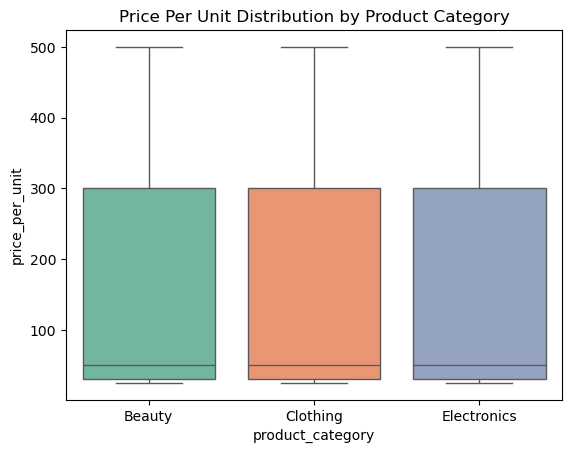

In [53]:
# Create the boxplot
sns.boxplot(data=retail_sales, x="product_category", y="price_per_unit", hue="product_category", palette="Set2")

# Add a title to the plot
plt.title("Price Per Unit Distribution by Product Category")

# Save the plot as an image file
plt.savefig("../plots/price_per_unit_distribution_by_product_category_boxplot.png", dpi=300, bbox_inches="tight")

# Optionally display the plot
plt.show()

In [86]:
retail_sales.groupby("product_category", observed=False)["price_per_unit"].describe()

,count,mean,std,min,25%,50%,75%,max
product_category,,,,,,,,
Beauty,307.0,184.055375,194.929399,25.0,30.0,50.0,300.0,500.0
Clothing,351.0,174.287749,186.017065,25.0,30.0,50.0,300.0,500.0
Electronics,342.0,181.900585,189.049673,25.0,30.0,50.0,300.0,500.0


**Conclusion:**  
- The price per unit is relatively similar across all product categories.  
- Beauty products have the highest average price per unit at 184.06, followed by electronics at 181.90, and clothing at 174.29.

## 5.11 product_category vs total_amount

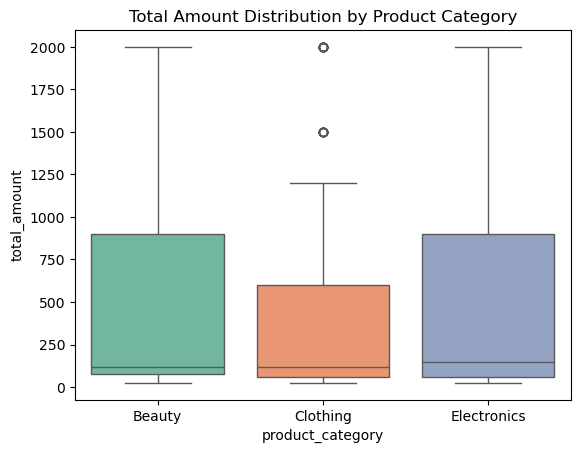

In [55]:
# Create the boxplot
sns.boxplot(data=retail_sales, x="product_category", y="total_amount", hue="product_category", palette="Set2")

# Add a title to the plot
plt.title("Total Amount Distribution by Product Category")

# Save the plot as an image file
plt.savefig("../plots/total_amount_distribution_by_product_category_boxplot.png", dpi=300, bbox_inches="tight")

# Optionally display the plot
plt.show()

In [56]:
retail_sales.groupby("product_category", observed=False)["total_amount"].describe()

,count,mean,std,min,25%,50%,75%,max
product_category,,,,,,,,
Beauty,307.0,467.475570,563.612788,25.0,75.0,120.0,900.0,2000.0
Clothing,351.0,443.247863,550.695917,25.0,60.0,120.0,600.0,2000.0
Electronics,342.0,458.786550,567.540150,25.0,60.0,150.0,900.0,2000.0


In [57]:
retail_sales.groupby("product_category", observed=False)["total_amount"].sum()

product_category
Beauty         143515
Clothing       155580
Electronics    156905
Name: total_amount, dtype: int64

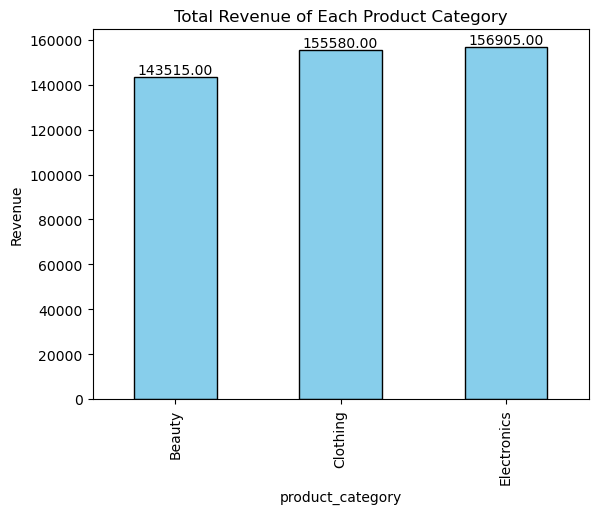

In [58]:
# Group data by product category and calculate total revenue
total_revenue = retail_sales.groupby("product_category", observed=False)["total_amount"].sum()

# Create a bar plot
ax = total_revenue.plot(kind="bar", ylabel="Revenue", title="Total Revenue of Each Product Category", color="skyblue", edgecolor="black")

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)

# Save the plot
plt.savefig("../plots/total_revenue_per_product_category.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

**Conclusion:**  
- Electronics generate the highest total sales, with a sum of 156,905.  
- Clothing follows closely with total sales of 155,580, and beauty products rank third with 143,515.
- The average total sales amount per transaction is highest for beauty products at 467.48, followed by electronics at 458.78, and clothing at 443.24.

# 6. Multivariate Analysis

In [59]:
retail_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    1000 non-null   int64         
 1   date              1000 non-null   datetime64[ns]
 2   customer_id       1000 non-null   object        
 3   gender            1000 non-null   category      
 4   age               1000 non-null   int64         
 5   product_category  1000 non-null   category      
 6   quantity          1000 non-null   int64         
 7   price_per_unit    1000 non-null   int64         
 8   total_amount      1000 non-null   int64         
dtypes: category(2), datetime64[ns](1), int64(5), object(1)
memory usage: 57.0+ KB


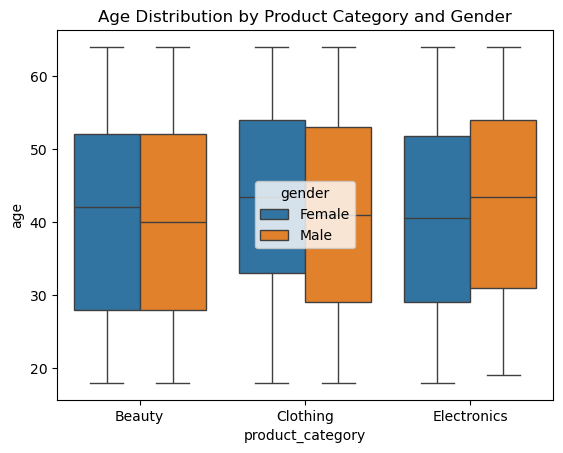

In [60]:
# Create the boxplot
sns.boxplot(data=retail_sales, x="product_category", y="age", hue="gender")

# Add a title to the plot
plt.title("Age Distribution by Product Category and Gender")

# Save the plot as an image file
plt.savefig("../plots/age_distribution_by_product_category_and_gender_boxplot.png", dpi=300, bbox_inches="tight")

# Optionally display the plot
plt.show()

In [61]:
retail_sales.groupby(["product_category", "gender"], observed=False)["age"].describe()

count       mean        std   min   25%   50%    75%  \
product_category gender                                                         
Beauty           Female  166.0  40.355422  13.832336  18.0  28.0  42.0  52.00   
                 Male    141.0  40.390071  14.006515  18.0  28.0  40.0  52.00   
Clothing         Female  174.0  43.166667  13.195762  18.0  33.0  43.5  54.00   
                 Male    177.0  40.751412  13.721057  18.0  29.0  41.0  53.00   
Electronics      Female  170.0  40.482353  13.574787  18.0  29.0  40.5  51.75   
                 Male    172.0  42.976744  13.689093  19.0  31.0  43.5  54.00   

                          max  
product_category gender        
Beauty           Female  64.0  
                 Male    64.0  
Clothing         Female  64.0  
                 Male    64.0  
Electronics      Female  64.0  
                 Male    64.0

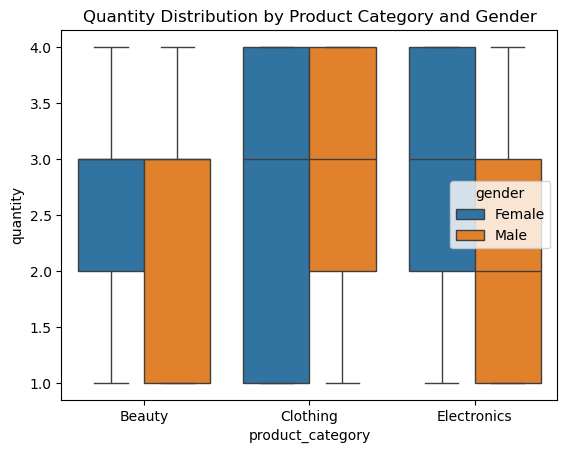

In [62]:
# Create the boxplot
sns.boxplot(data=retail_sales, x="product_category", y="quantity", hue="gender")

# Add a title to the plot
plt.title("Quantity Distribution by Product Category and Gender")

# Save the plot as an image file
plt.savefig("../plots/quantity_distribution_by_product_category_and_gender_boxplot.png", dpi=300, bbox_inches="tight")

# Optionally display the plot
plt.show()

In [63]:
retail_sales.groupby(["product_category", "gender"], observed=False)["quantity"].describe()

count      mean       std  min  25%  50%  75%  max
product_category gender                                                    
Beauty           Female  166.0  2.518072  1.082774  1.0  2.0  3.0  3.0  4.0
                 Male    141.0  2.503546  1.125193  1.0  1.0  3.0  3.0  4.0
Clothing         Female  174.0  2.534483  1.151257  1.0  1.0  3.0  4.0  4.0
                 Male    177.0  2.559322  1.137249  1.0  2.0  3.0  4.0  4.0
Electronics      Female  170.0  2.582353  1.164939  1.0  2.0  3.0  4.0  4.0
                 Male    172.0  2.383721  1.135999  1.0  1.0  2.0  3.0  4.0

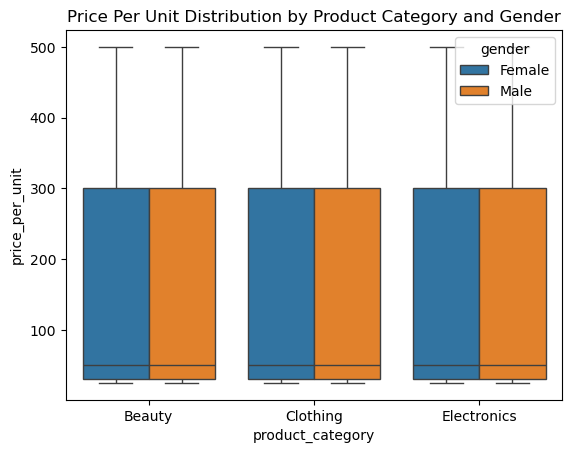

In [64]:
# Create the boxplot
sns.boxplot(data=retail_sales, x="product_category", y="price_per_unit", hue="gender")

# Add a title to the plot
plt.title("Price Per Unit Distribution by Product Category and Gender")

# Save the plot as an image file
plt.savefig("../plots/price_per_unit_distribution_by_product_category_and_gender_boxplot.png", dpi=300, bbox_inches="tight")

# Optionally display the plot
plt.show()

In [65]:
retail_sales.groupby(["product_category", "gender"], observed=False)["price_per_unit"].describe()

count        mean         std   min   25%   50%  \
product_category gender                                                    
Beauty           Female  166.0  182.349398  194.303476  25.0  30.0  50.0   
                 Male    141.0  186.063830  196.337727  25.0  30.0  50.0   
Clothing         Female  174.0  179.224138  187.002832  25.0  30.0  50.0   
                 Male    177.0  169.435028  185.444697  25.0  30.0  50.0   
Electronics      Female  170.0  178.705882  186.410587  25.0  30.0  50.0   
                 Male    172.0  185.058140  192.114266  25.0  30.0  50.0   

                           75%    max  
product_category gender                
Beauty           Female  300.0  500.0  
                 Male    300.0  500.0  
Clothing         Female  300.0  500.0  
                 Male    300.0  500.0  
Electronics      Female  300.0  500.0  
                 Male    300.0  500.0

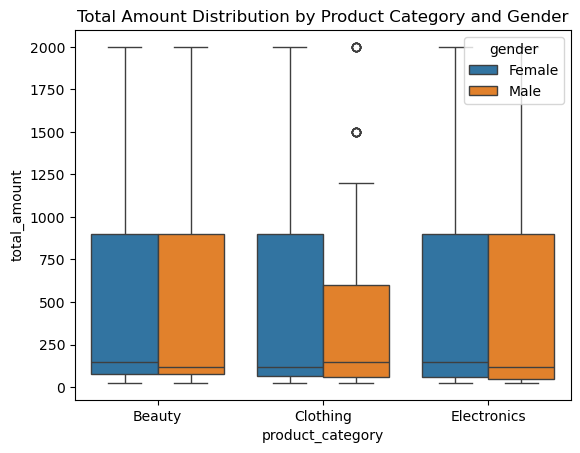

In [66]:

# Create the boxplot
sns.boxplot(data=retail_sales, x="product_category", y="total_amount", hue="gender")

# Add a title to the plot
plt.title("Total Amount Distribution by Product Category and Gender")

# Save the plot as an image file
plt.savefig("../plots/total_amount_distribution_by_product_category_and_gender_boxplot.png", dpi=300, bbox_inches="tight")

# Optionally display the plot
plt.show()

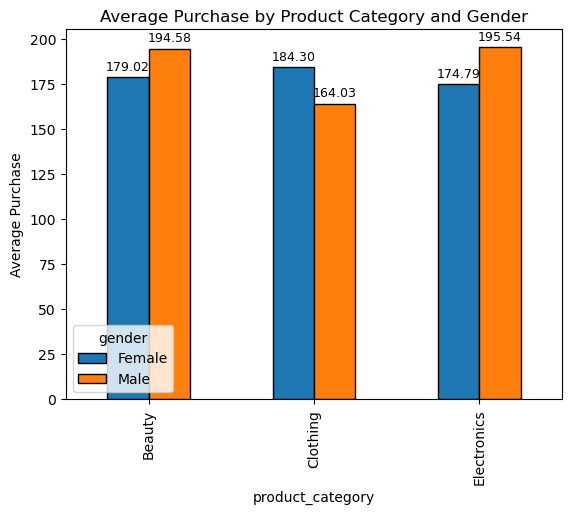

In [67]:

# Group by 'product_category' and 'gender', calculate the average purchase
data = retail_sales[["product_category", "gender", "quantity", "total_amount"]].groupby(["product_category", "gender"], observed=False).sum()

data["average_purchase"] = data["total_amount"] / data["quantity"]

# Create a bar plot
ax = data["average_purchase"].unstack().plot(kind="bar", ylabel="Average Purchase", title="Average Purchase by Product Category and Gender", edgecolor="black")

# Add exact numbers on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=9, padding=3)

# Save the plot as an image file
plt.savefig("../plots/average_purchase_by_product_category_and_gender.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

In [68]:
retail_sales.groupby(["product_category", "gender"], observed=False)["total_amount"].sum()

product_category  gender
Beauty            Female    74830
                  Male      68685
Clothing          Female    81275
                  Male      74305
Electronics       Female    76735
                  Male      80170
Name: total_amount, dtype: int64

In [69]:
retail_sales.groupby(["product_category", "gender"], observed=False)["total_amount"].describe()

count        mean         std   min    25%    50%  \
product_category gender                                                      
Beauty           Female  166.0  450.783133  538.735040  25.0  75.00  150.0   
                 Male    141.0  487.127660  592.899725  25.0  75.00  120.0   
Clothing         Female  174.0  467.097701  577.016491  25.0  63.75  120.0   
                 Male    177.0  419.802260  524.116237  25.0  60.00  150.0   
Electronics      Female  170.0  451.382353  548.644646  25.0  60.00  150.0   
                 Male    172.0  466.104651  587.129702  25.0  50.00  120.0   

                           75%     max  
product_category gender                 
Beauty           Female  900.0  2000.0  
                 Male    900.0  2000.0  
Clothing         Female  900.0  2000.0  
                 Male    600.0  2000.0  
Electronics      Female  900.0  2000.0  
                 Male    900.0  2000.0

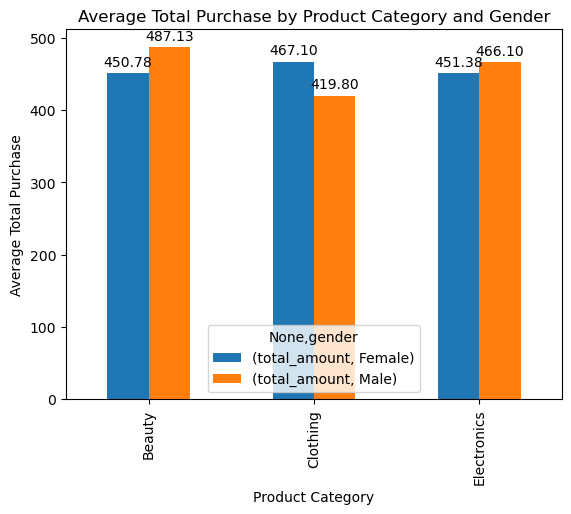

In [70]:
# Group by 'product_category' and 'gender', then sum the 'total_amount'
grouped_data = retail_sales[["product_category", "gender", "total_amount"]].groupby(["product_category", "gender"], observed=False).mean()

# Create a bar plot
ax = grouped_data.unstack().plot(kind="bar", stacked=False)

# Set labels and title
plt.xlabel("Product Category")
plt.ylabel("Average Total Purchase")
plt.title("Average Total Purchase by Product Category and Gender")

# Add value labels on top of each barb
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

# Save the plot as an image file
plt.savefig("../plots/average_total_purchase_by_product_category_and_gender.png", dpi=300, bbox_inches="tight")

# Show plot
plt.show()


<Axes: xlabel='age'>

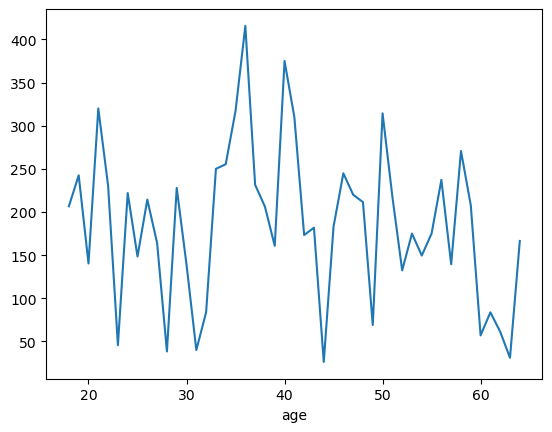

In [71]:
beauty_retail = retail_sales[retail_sales["product_category"] == "Beauty"]

data = beauty_retail[["age", "quantity", "total_amount"]].groupby("age").sum()

data["average_purchase"] = data["total_amount"] / data["quantity"]

data["average_purchase"].plot()

<Axes: xlabel='age'>

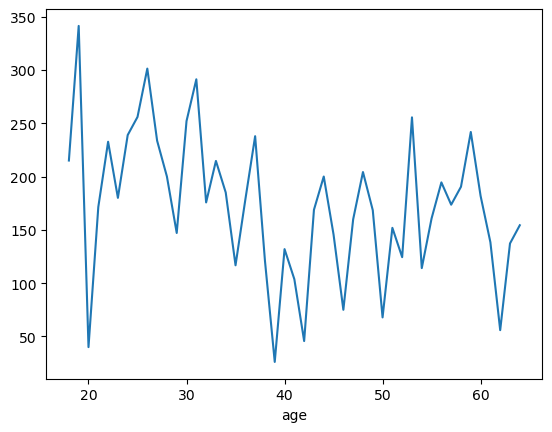

In [72]:
clothing_retail = retail_sales[retail_sales["product_category"] == "Clothing"]

data = clothing_retail[["age", "quantity", "total_amount"]].groupby("age").sum()

data["average_purchase"] = data["total_amount"] / data["quantity"]

data["average_purchase"].plot()

<Axes: xlabel='age'>

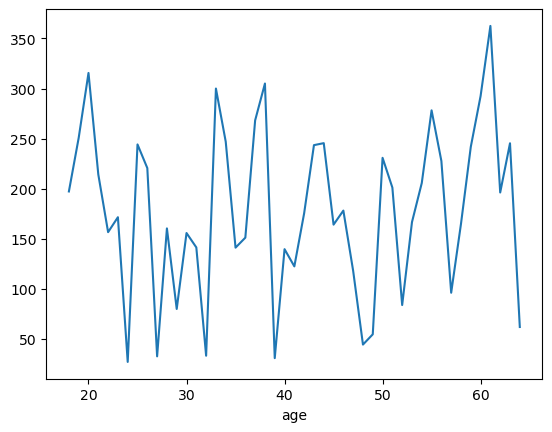

In [73]:
electronic_retail = retail_sales[retail_sales["product_category"] == "Electronics"]

data = electronic_retail[["age", "quantity", "total_amount"]].groupby("age").sum()

data["average_purchase"] = data["total_amount"] / data["quantity"]

data["average_purchase"].plot()

# 7. Time Series Analysis

## 7.1 Monthly Sales

In [74]:
retail_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    1000 non-null   int64         
 1   date              1000 non-null   datetime64[ns]
 2   customer_id       1000 non-null   object        
 3   gender            1000 non-null   category      
 4   age               1000 non-null   int64         
 5   product_category  1000 non-null   category      
 6   quantity          1000 non-null   int64         
 7   price_per_unit    1000 non-null   int64         
 8   total_amount      1000 non-null   int64         
dtypes: category(2), datetime64[ns](1), int64(5), object(1)
memory usage: 57.0+ KB


In [75]:
retail_sales_dindex = retail_sales[retail_sales["date"] <= "2023-12-31"].set_index("date")

retail_sales_dindex.head()

,transaction_id,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
date,,,,,,,,
2023-11-24,1,CUST001,Male,34,Beauty,3,50,150
2023-02-27,2,CUST002,Female,26,Clothing,2,500,1000
2023-01-13,3,CUST003,Male,50,Electronics,1,30,30
2023-05-21,4,CUST004,Male,37,Clothing,1,500,500
2023-05-06,5,CUST005,Male,30,Beauty,2,50,100


In [76]:
retail_sales_dindex["total_amount"].resample("ME").sum().mean()

37872.5

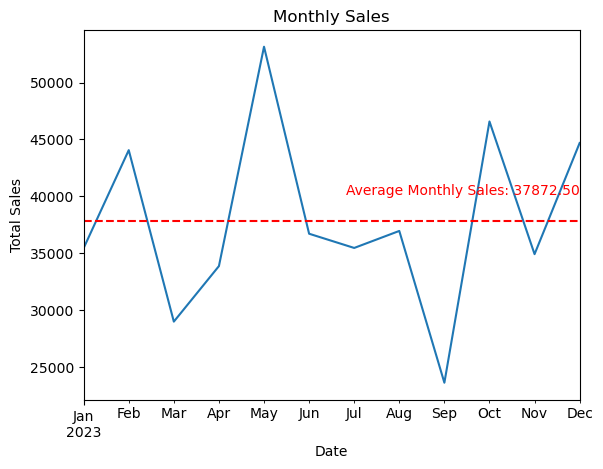

In [77]:
monthly_sales = retail_sales_dindex["total_amount"].resample("ME").sum()
average_monthly_sales = monthly_sales.mean()

# Create the plot
monthly_sales.plot(title="Monthly Sales", xlabel="Date", ylabel="Total Sales")

# Add a horizontal line for the average monthly sales
plt.axhline(y=average_monthly_sales, color='red', linestyle='--', label='Average Monthly Sales')

# Add text displaying the average monthly sales value
plt.text(
    x=monthly_sales.index[-1],  # Position at the end of the plot
    y=average_monthly_sales + 2000,  # Align with the average line
    s=f'Average Monthly Sales: {average_monthly_sales:.2f}',  # Text to display
    color='r',
    ha='right',  # Align text to the right
    va='bottom',  # Align text below the line
    fontsize=10
)

# Optionally, save the plot as an image file
plt.savefig("../plots/monthly_sales_with_average.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

In [78]:
monthly_sales

date
2023-01-31    35450
2023-02-28    44060
2023-03-31    28990
2023-04-30    33870
2023-05-31    53150
2023-06-30    36715
2023-07-31    35465
2023-08-31    36960
2023-09-30    23620
2023-10-31    46580
2023-11-30    34920
2023-12-31    44690
Freq: ME, Name: total_amount, dtype: int64

## 7.2 Monthly Sales per Product Category

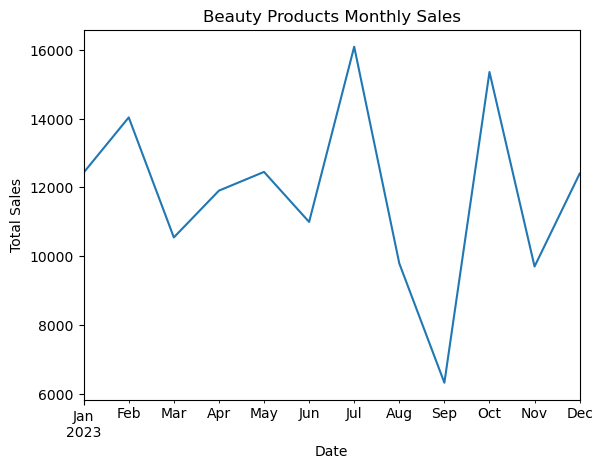

In [79]:
# Apply the condition for 'Beauty' product category
condition = retail_sales_dindex["product_category"] == "Beauty"

# Plot the monthly sales for beauty products
retail_sales_dindex[condition]["total_amount"].resample("ME").sum().plot(title="Beauty Products Monthly Sales", xlabel="Date", ylabel="Total Sales")

# Optionally, save the plot as an image file
plt.savefig("../plots/beauty_products_monthly_sales.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

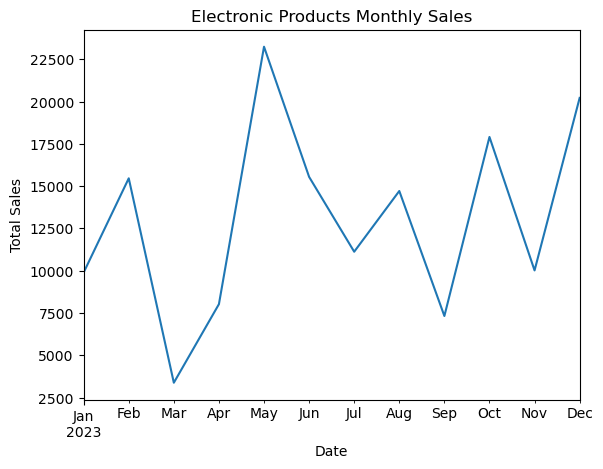

In [80]:
# Apply the condition for 'Electronics' product category
condition = retail_sales_dindex["product_category"] == "Electronics"

# Plot the monthly sales for electronic products
retail_sales_dindex[condition]["total_amount"].resample("ME").sum().plot(title="Electronic Products Monthly Sales", xlabel="Date", ylabel="Total Sales")

# Optionally, save the plot as an image file
plt.savefig("../plots/electronic_products_monthly_sales.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

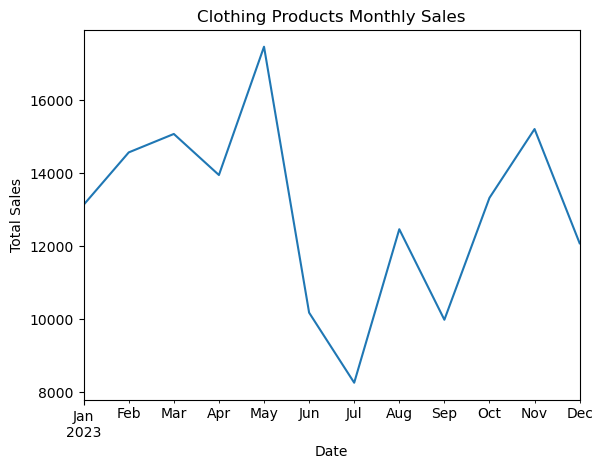

In [81]:
# Apply the condition for 'Clothing' product category
condition = retail_sales_dindex["product_category"] == "Clothing"

# Plot the monthly sales for clothing products
retail_sales_dindex[condition]["total_amount"].resample("ME").sum().plot(title="Clothing Products Monthly Sales", xlabel="Date", ylabel="Total Sales")

# Optionally, save the plot as an image file
plt.savefig("../plots/clothing_products_monthly_sales.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

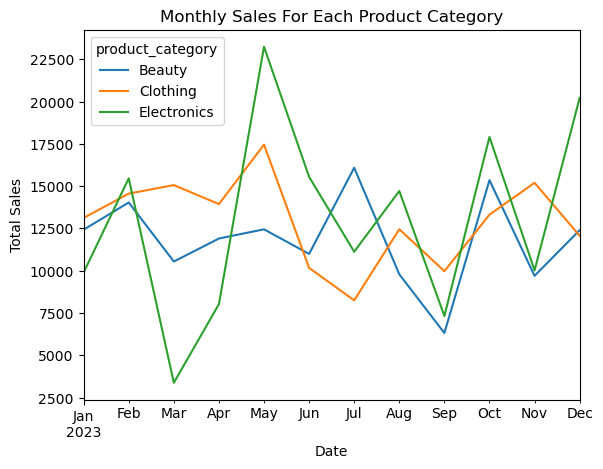

In [82]:
# Group the retail sales by 'date' and 'product_category', and sum the 'total_amount'
grouped_retail_sales = retail_sales[retail_sales["date"] <= "2023-12-31"].groupby(["date", "product_category"], observed=False)["total_amount"].sum().unstack()

# Resample the grouped sales by month and calculate the sum
monthly_sales_per_pc = grouped_retail_sales.resample("ME").sum()

# Plot the monthly sales for each product category
monthly_sales_per_pc.plot(title="Monthly Sales For Each Product Category", xlabel="Date", ylabel="Total Sales")

# Optionally, save the plot as an image file
plt.savefig("../plots/monthly_sales_for_each_product_category.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()